![sunset.jpg](images/sunset.jpg)
<h1 style="color:black" align="center">Predicting Breast Cancer Using Machine Learning.</h1>

It's something classical for just about any data science practitioners out there, in extending their initial milestone with various resources of dataset around the internet. That way, you could expand your skill sets and experiences with something that you're less familiar with and gain new knowledge and expertise from it. This article is no different, where I wish to explore further on different areas aside from my current domain of expertise.   

Aside from `digital marketing` or `media investment`, `healthcare` is another industry that really caught my attention. According to [WHO official site](https://www.who.int/news-room/fact-sheets/detail/cancer#:~:text=Cancer%20is%20the%20second%20leading,-%20and%20middle-income%20countries.), Cancer is the second leading cause of death globally, and is responsible for an estimated 9.6 million deaths in 2018. 

And moving forward, this article will try to address and give an overview on how you may apply `Machine Learning` to predict the symptoms of breast cancer to a certain individual. The cancer dataset graciously donated from various academicians & can be found at [UCI](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29) site

Furthermore, we'll be using [Python](https://www.python.org/) flavor of [Pandas](https://pandas.pydata.org/), [Seaborn](https://seaborn.pydata.org/) and [Scikit-learn](https://scikit-learn.org/) libraries to explore, clean, combine and run machine-learning prediction model for our use case. As it will become rather a long piece of article, I will try to break them down into the several steps, as per the following list of pointers.

1. `Loading Libraries.`  
2. `Data Exploring.` 
3. `Data Visualization.`
4. `One Hot Encoding.`
5. `Feature Generation.`
6. `Data Splitting.`
7. `Machine Learning Modelling.`
8. `Data Prediciton.`

## Load Libraries

Much like any other data exploratory process in Pandas or Python, the initial phase would be to load the libraries onto our working Jupyter Notebook environment. You're free to use just about any IDE out there, much like Google Colab or even Kaggle to run this Kernel. But for the sake of simplicity, I'll stick to my faithful Jupyter Notebook environment for the rest of the tutorial.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library

## Load Dataset

Create a directory anywhere in your computer, I'm on a MacOS environment, but the instructions given in this article, are similar and working for different platforms at the same time. And for the sake of this walkthrough, let's just name it something like `Project`. Next, go inside the `Project` folder, as this will be our main working directory. Be sure to download the dataset from the [UCI](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29) site.  

Create another directory inside the `Project` directory, let's call it `data`, copy the CSV file to that particular directory, that way you may follow along with all the steps in this article. Now that we're ready to load the dataset onto our Jupyter Notebook, that way we may examine, manipulate and observe them further.

In [2]:
df = pd.read_csv('data/breast_cancer_data.csv')

## Dataset Size

Once that we've done all the procedures, we can than analyze our dataset further. What if our inital question, just how big our dataset is? We could potentially deliver that information easily by using the `.shape` method. It would return us with the rows and columns volumes number coming from our dataset.

In [3]:
df.shape

(699, 12)

### Rows & Columns

We can see we have the following information at hand: 
- rows `699`
- columns `12`

## Data Types

It's always a good initiative to understand also what are dataset really composed of. Not just merely on the volume or size standpoint, but also at the data types for each columns available on our dataset. That way, once we've reached our features generation phase, we could understand them a little bit deeper. 

In [4]:
# We need to observe the data types of each columns
df.dtypes

patient_id                 int64
clump_thickness          float64
cell_size_uniformity     float64
cell_shape_uniformity      int64
marginal_adhesion          int64
single_ep_cell_size        int64
bare_nuclei               object
bland_chromatin          float64
normal_nucleoli          float64
mitoses                    int64
class                     object
doctor_name               object
dtype: object

### The Data Legend

In the data we have the following columns as described by the source

- `Patient ID`: id number 
- `Clump Thickness`: 1–10 
- `Uniformity of Cell Size`: 1–10 
- `Uniformity of Cell Shape`: 1–10 
- `Marginal Adhesion`: 1–10 
- `Single Epithelial Cell Size`: 1–10 
- `Bare Nuclei`: 1–10 
- `Bland Chromatin`: 1–10 
- `Normal Nucleoli`: 1–10 
- `Mitoses`: 1–10 
- `Class`: malignant or benign
- `Doctor name`: 4 different doctors.

Based on this, we can assume that `patient_id` is a unique identifier, the `class` is going to tell us whether the tumor is `malignant` (cancerous) or `benign` (not cancerous). The remaining columns are numeric medical descriptions of the tumor, except for the `doctor_name` which is a categorical feature.

> Things to keep in mind — If our goal is to predict wether a tumor is
> cancerous or not based on the remaining features, we will have to perform 
> one hot encode the categorical data and clean up the numerical data.

## First & Last Rows

With that being said, let's dive further and see what's the top 5 records coming from our dataset would look like.

In [5]:
df.head()

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Doe
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,benign,Dr. Smith
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,benign,Dr. Lee
3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,benign,Dr. Smith
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,benign,Dr. Wong


In [6]:
df.tail()

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
694,776715,3.0,1.0,1,1,3,2,1.0,1.0,1,benign,Dr. Lee
695,841769,2.0,1.0,1,1,2,1,1.0,1.0,1,benign,Dr. Smith
696,888820,5.0,10.0,10,3,7,3,8.0,10.0,2,malignant,Dr. Lee
697,897471,4.0,8.0,6,4,3,4,10.0,6.0,1,malignant,Dr. Lee
698,897471,4.0,8.0,8,5,4,5,10.0,4.0,1,malignant,Dr. Wong


<hr />

## Descriptive Statistics

### Numerical Analysis

- *`.describe()`* 

The above method can show different statistical values like `count`, `mean`, `standard deviation`, etc. of `numeric` data types. This way, we have finer understanding about our current dataset, and how we may explore them even further.

In [7]:
df.describe()

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bland_chromatin,normal_nucleoli,mitoses
count,6.990000e+02,698.000000,698.000000,699.000000,699.000000,699.000000,695.000000,698.000000,699.000000
mean,1.071704e+06,4.416905,3.137536,3.207439,2.793991,3.216023,3.447482,2.868195,1.589413
std,6.170957e+05,2.817673,3.052575,2.971913,2.843163,2.214300,2.441191,3.055647,1.715078
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,3.500000,4.000000,5.000000,4.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


### Categorical Analysis

Much like the similar method above, the following method would give similar output, though very limited. Since the variables on the columns are on the `categorical` (with data types of an `object` oppose to an `integer`), rather than `numerical` type, much like the previous one.

- *`describe(include = ['O'])`* <br>
Will show the descriptive statistics of `object` (categorical) data types.

In [8]:
df.describe(include=['O'])

,bare_nuclei,class,doctor_name
count,697,699,699
unique,11,2,4
top,1,benign,Dr. Doe
freq,401,458,185


## Data Reshaping

In [9]:
# This aggreates the data by its column names, then we pass the aggregation function (size = count)
df.groupby(by =['doctor_name', 'class']).count()

patient_id  clump_thickness  cell_size_uniformity  \
doctor_name class                                                          
Dr. Doe     benign            127              127                   126   
            malignant          58               58                    58   
Dr. Lee     benign            121              121                   121   
            malignant          60               60                    60   
Dr. Smith   benign            102              102                   102   
            malignant          74               73                    74   
Dr. Wong    benign            108              108                   108   
            malignant          49               49                    49   

                       cell_shape_uniformity  marginal_adhesion  \
doctor_name class                                                 
Dr. Doe     benign                       127                127   
            malignant                     58                 58   
Dr. Lee     benign                       121                121   
            malignant                     60                 60   
Dr. Smith   benign                       102                102   
            malignant                     74                 74   
Dr. Wong    benign                       108                108   
            malignant                     49                 49   

                       single_ep_cell_size  bare_nuclei  bland_chromatin  \
doctor_name class                                                          
Dr. Doe     benign                     127          126              126   
            malignant                   58           58               57   
Dr. Lee     benign                     121          121              119   
            malignant                   60           60               60   
Dr. Smith   benign                     102          102              102   
            malignant                   74           73               74   
Dr. Wong    benign                     108          108              108   
            malignant                   49           49               49   

                       normal_nucleoli  mitoses  
doctor_name class                                
Dr. Doe     benign                 127      127  
            malignant               58       58  
Dr. Lee     benign                 121      121  
            malignant               60       60  
Dr. Smith   benign                 102      102  
            malignant               74       74  
Dr. Wong    benign                 107      108  
            malignant               49       49

In [10]:
df.groupby(by =['class', 'doctor_name']).count()

patient_id  clump_thickness  cell_size_uniformity  \
class     doctor_name                                                      
benign    Dr. Doe             127              127                   126   
          Dr. Lee             121              121                   121   
          Dr. Smith           102              102                   102   
          Dr. Wong            108              108                   108   
malignant Dr. Doe              58               58                    58   
          Dr. Lee              60               60                    60   
          Dr. Smith            74               73                    74   
          Dr. Wong             49               49                    49   

                       cell_shape_uniformity  marginal_adhesion  \
class     doctor_name                                             
benign    Dr. Doe                        127                127   
          Dr. Lee                        121                121   
          Dr. Smith                      102                102   
          Dr. Wong                       108                108   
malignant Dr. Doe                         58                 58   
          Dr. Lee                         60                 60   
          Dr. Smith                       74                 74   
          Dr. Wong                        49                 49   

                       single_ep_cell_size  bare_nuclei  bland_chromatin  \
class     doctor_name                                                      
benign    Dr. Doe                      127          126              126   
          Dr. Lee                      121          121              119   
          Dr. Smith                    102          102              102   
          Dr. Wong                     108          108              108   
malignant Dr. Doe                       58           58               57   
          Dr. Lee                       60           60               60   
          Dr. Smith                     74           73               74   
          Dr. Wong                      49           49               49   

                       normal_nucleoli  mitoses  
class     doctor_name                            
benign    Dr. Doe                  127      127  
          Dr. Lee                  121      121  
          Dr. Smith                102      102  
          Dr. Wong                 107      108  
malignant Dr. Doe                   58       58  
          Dr. Lee                   60       60  
          Dr. Smith                 74       74  
          Dr. Wong                  49       49

In [11]:
df.groupby(by =['bare_nuclei', 'class']).count()

patient_id  clump_thickness  cell_size_uniformity  \
bare_nuclei class                                                          
1           benign            386              386                   386   
            malignant          15               15                    15   
10          benign              3                3                     2   
            malignant         128              128                   128   
2           benign             21               21                    21   
            malignant           9                9                     9   
3           benign             14               14                    14   
            malignant          14               13                    14   
4           benign              6                6                     6   
            malignant          13               13                    13   
5           benign             10               10                    10   
            malignant          20               20                    20   
6           malignant           4                4                     4   
7           benign              1                1                     1   
            malignant           7                7                     7   
8           benign              2                2                     2   
            malignant          19               19                    19   
9           malignant           9                9                     9   
?           benign             14               14                    14   
            malignant           2                2                     2   

                       cell_shape_uniformity  marginal_adhesion  \
bare_nuclei class                                                 
1           benign                       386                386   
            malignant                     15                 15   
10          benign                         3                  3   
            malignant                    128                128   
2           benign                        21                 21   
            malignant                      9                  9   
3           benign                        14                 14   
            malignant                     14                 14   
4           benign                         6                  6   
            malignant                     13                 13   
5           benign                        10                 10   
            malignant                     20                 20   
6           malignant                      4                  4   
7           benign                         1                  1   
            malignant                      7                  7   
8           benign                         2                  2   
            malignant                     19                 19   
9           malignant                      9                  9   
?           benign                        14                 14   
            malignant                      2                  2   

                       single_ep_cell_size  bland_chromatin  normal_nucleoli  \
bare_nuclei class                                                              
1           benign                     386              383              385   
            malignant                   15               15               15   
10          benign                       3                3                3   
            malignant                  128              128              128   
2           benign                      21               21               21   
            malignant                    9                9                9   
3           benign                      14               14               14   
            malignant                   14               14               14   
4           benign                       6                6                

<hr >

# Data Cleaning

Now that we have finished with the early analysis phase, let's move on to the next steps on cleaning-up the dataset. Your data may come in real life with different shapes and sized. But the best one to analyze would be the complete and most comprehensive one that we could extrapolate and build features engineering for further analysis. 

## Missing Records

Among one of the easiet way to identify whether or not your dataset has any missing data in them, would be to check them using the `.isna()` method and combine them with the `.sum()` function. It would in return, give you information on how many rows gone missing in your current dataset. Usually Pandas, would assing them with the value of `NaN`, but it can always be just a blank value in the record cell. 

In [12]:
df.isna().sum() 

patient_id               0
clump_thickness          1
cell_size_uniformity     1
cell_shape_uniformity    0
marginal_adhesion        0
single_ep_cell_size      0
bare_nuclei              2
bland_chromatin          4
normal_nucleoli          1
mitoses                  0
class                    0
doctor_name              0
dtype: int64

Good to know that the `patient_id` has 0 missing values, but as you may notice, others columns much like `clump_thickness`, `cell_size_uniformity`, `bare_nuclei`, `bland_chromatin` and `normal_nucleoli`. And to put them in total, there are 9 missing rows in the dataset. 

## How To Deal with?

The real question would be, not how you would identify the missing record and sum them in total, but rather how you would deal with them before you move on and proceed with your data wrangling journey. Alas, for this particular case alone, considering it's only a small amount of data that the values gone missing, which is `9 rows` out of `699`, so that would make only `0.012` or less than 1% of the total cell records from the dataset. This time, I may think to remove them instead with the `.dropna` method. And while we're at it, here's the attribution that may follow the `.dropna` method.

- `Axis`: Whether you need to drop them at the _row_ level or the _column_ `0` means _row_ while `1` applies to _column_.
- `How`: This attribute has 2 values, _any_ or _all_. If `all` is supplied, it will drop an row or coloumn which is completely empty (`all`), or even with only a single empty cell (`any`).
- `Inplace`: If you haven't come across  `inplace`  yet, learn this now: changes will NOT be made to the DataFrame you're touching unless this is set to  `True`. It's  `False`  by default.

In [13]:
df.dropna(axis=0, how='any', inplace=True)

In [14]:
df

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Doe
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,benign,Dr. Smith
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,benign,Dr. Lee
3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,benign,Dr. Smith
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,benign,Dr. Wong
...,...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3.0,1.0,1,1,3,2,1.0,1.0,1,benign,Dr. Lee
695,841769,2.0,1.0,1,1,2,1,1.0,1.0,1,benign,Dr. Smith
696,888820,5.0,10.0,10,3,7,3,8.0,10.0,2,malignant,Dr. Lee
697,897471,4.0,8.0,6,4,3,4,10.0,6.0,1,malignant,Dr. Lee


As you can see now, the rows number have been decreased, from `699` to `690`, down with `9` records, but left us with clean dataset with no empty cells in them. Let move on to check them!

In [15]:
# df['bare_nuclei'].isnull().values.any()
# df['bare_nuclei'].isnull().sum()
df.isnull().values.any()


False

## Rechecking

Now that we know we've a clean dataset with no empty records, that just left us wondering, would there be any other way to perform the empty cell checking, well the good news is, there's a method called `.isnull` to perform a _boolean_ method checking, which in return would give you a `true` or `false` respond to your inquiry, let's do them!

In [16]:
df.isnull()

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
694,False,False,False,False,False,False,False,False,False,False,False,False
695,False,False,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,False,False


So far so good, from the above dataset, everything returning us with a `False` values in return. That would indicate one thing, our dataset is all set and ready for its next adventure, so let's move on to our next journey.

## Duplicate Records

First we need to investigate, whether or not our dataset has any duplication in the cell records, by performing that early identification process, we may prevent from further hurdles that could potentially create bias within the output of our analysis. We'll try to do that with the `.nunique` method, which in return would deliver us couple of pointers that we may use to detect any anomalies. We'll start by analyzing columns that supposed to have a unique identifier (an `object` in the datatype columns), which in our case is the `patient_id` column.

In [17]:
df.nunique()

patient_id               637
clump_thickness           10
cell_size_uniformity      10
cell_shape_uniformity     10
marginal_adhesion         10
single_ep_cell_size       10
bare_nuclei               11
bland_chromatin           10
normal_nucleoli           10
mitoses                    9
class                      2
doctor_name                4
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 698
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             690 non-null    int64  
 1   clump_thickness        690 non-null    float64
 2   cell_size_uniformity   690 non-null    float64
 3   cell_shape_uniformity  690 non-null    int64  
 4   marginal_adhesion      690 non-null    int64  
 5   single_ep_cell_size    690 non-null    int64  
 6   bare_nuclei            690 non-null    object 
 7   bland_chromatin        690 non-null    float64
 8   normal_nucleoli        690 non-null    float64
 9   mitoses                690 non-null    int64  
 10  class                  690 non-null    object 
 11  doctor_name            690 non-null    object 
dtypes: float64(4), int64(5), object(3)
memory usage: 70.1+ KB


We know for sure that our dataset consist of `690` rows and `12` columns (down from the previous `699`). While if we checked from the above data, we can discover the `patient_id` has only `637` records in them. Something's not right here, especially if you happened to know the background of that data, which supposed to be a unique identifier, meaning, there should be one solid `690` records of data, instead of just `637`, let's investigate further on this aspect. There has to be a duplication on this `patient_id` column.

### Duplicate Patients

And now that just left us wondering again, of which from the `patient_id` records get recorded multipe times? The following solution, would give us a better overview of the situation we're facing now.
- borrow from https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python

In [19]:
df[df.patient_id.duplicated(keep=False)].sort_values("patient_id")

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
267,320675,3.0,3.0,5,2,3,10,7.0,1.0,1,malignant,Dr. Wong
272,320675,3.0,3.0,5,2,3,10,7.0,1.0,1,malignant,Dr. Smith
575,385103,5.0,1.0,2,1,2,1,3.0,1.0,1,benign,Dr. Smith
269,385103,1.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Doe
271,411453,5.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Wong
...,...,...,...,...,...,...,...,...,...,...,...,...
560,1321942,5.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Doe
660,1339781,1.0,1.0,1,1,2,1,2.0,1.0,1,benign,Dr. Lee
661,1339781,4.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Smith
672,1354840,2.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Wong


As it appeared, there are `98` records of `patient_id` getting recorded multiple times in our dataset. Some are getting recorded twice others were even recorded more than twice. Don't you wish, you have finer understanding of what `patient_id` values `count` that made of the duplication composition made? Well, let's dive in further to investigate this `subset` by analyzing each duplication and count the total values.

### Count Duplications

Let's analyze how many times a single `patient_id` value, was being recorded more than once, in the next table. 
- borrow from https://stackoverflow.com/questions/38309729/count-unique-values-with-pandas-per-groups

In [20]:
df.patient_id.value_counts()

1182404    6
1276091    5
1198641    3
769612     2
1240603    2
          ..
1181356    1
1125035    1
1201834    1
432809     1
625201     1
Name: patient_id, Length: 637, dtype: int64

Surpisingly, some are getting recorded more than twice, some are even getting recorded 6 times. Let's move on to the next steps on how to deal with them. 

In [21]:
df.drop_duplicates(subset="patient_id", keep='first', inplace = True)
df # let's print them.

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Doe
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,benign,Dr. Smith
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,benign,Dr. Lee
3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,benign,Dr. Smith
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,benign,Dr. Wong
...,...,...,...,...,...,...,...,...,...,...,...,...
693,763235,3.0,1.0,1,1,2,1,2.0,1.0,2,benign,Dr. Lee
694,776715,3.0,1.0,1,1,3,2,1.0,1.0,1,benign,Dr. Lee
695,841769,2.0,1.0,1,1,2,1,1.0,1.0,1,benign,Dr. Smith
696,888820,5.0,10.0,10,3,7,3,8.0,10.0,2,malignant,Dr. Lee


Great, the above code just left us with one clean and no duplicated rows of data. Now the records are down from `690` to `637`. Now let's check wheter their still duplicates from the previous list of `patient_id` we had queried earlier, let's try the `1182404` `patient_id` string for that matter.

In [22]:
# let's check whether the 1182404 patient_id still has duplication.
df.loc[df['patient_id'] == 1182404]

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
136,1182404,4.0,1.0,1,1,2,1,2.0,1.0,1,benign,Dr. Lee


In [23]:
df.isnull().values.any()

False

# Visual Analysis 

And they say, picture says a thousand words. And I couldn't agree more with the statement, we as a human easily absorb information, through graphs, colors and visualization, in contrast to just plain numbers. In this section, let's try to visualize our findings better. 

There are numerous great visualization libraries out there for both Python and Pandas, but I've been experimenting with Seaborn for awhile, and found them somewhat easier to implement to our objectives. Here are some of the benefit of having Seaborn as your library of choice for visualtization as taken from the official homepage:

> Seaborn aims to make visualization a central part of exploring and understanding data. Its dataset-oriented plotting > functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic 
> mapping and statistical aggregation to produce informative plots.

Here is some of the functionality that seaborn offers:

-   A dataset-oriented API for examining  [relationships](https://seaborn.pydata.org/examples/scatter_bubbles.html#scatter-bubbles)  between  [multiple variables](https://seaborn.pydata.org/examples/faceted_lineplot.html#faceted-lineplot)
    
-   Specialized support for using categorical variables to show  [observations](https://seaborn.pydata.org/examples/jitter_stripplot.html#jitter-stripplot)  or  [aggregate statistics](https://seaborn.pydata.org/examples/pointplot_anova.html#pointplot-anova)
    
-   Options for visualizing  [univariate](https://seaborn.pydata.org/examples/distplot_options.html#distplot-options)  or  [bivariate](https://seaborn.pydata.org/examples/joint_kde.html#joint-kde)  distributions and for  [comparing](https://seaborn.pydata.org/examples/horizontal_boxplot.html#horizontal-boxplot)  them between subsets of data
    
-   Automatic estimation and plotting of  [linear regression](https://seaborn.pydata.org/examples/anscombes_quartet.html#anscombes-quartet)  models for different kinds  [dependent](https://seaborn.pydata.org/examples/logistic_regression.html#logistic-regression)  variables
    
-   Convenient views onto the overall  [structure](https://seaborn.pydata.org/examples/scatterplot_matrix.html#scatterplot-matrix)  of complex datasets
    
-   High-level abstractions for structuring  [multi-plot grids](https://seaborn.pydata.org/examples/faceted_histogram.html#faceted-histogram)  that let you easily build  [complex](https://seaborn.pydata.org/examples/pair_grid_with_kde.html#pair-grid-with-kde)  visualizations
    
-   Concise control over matplotlib figure styling with several  [built-in themes](https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial)
    
-   Tools for choosing  [color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial)  that faithfully reveal patterns in your data


## Patients for Each Doctor?

Ever wonder how many patients each doctor handled from the dataset? We know for sure, we have 4 doctors from the dataset, but haven't got some perfect ideas on how many patients each doctor is handling them. So why don't we try to visualize them, to see how many patients for each doctor needs to handle from the dataset?

In [24]:
df['doctor_name'].value_counts()

Dr. Doe      167
Dr. Lee      165
Dr. Smith    164
Dr. Wong     141
Name: doctor_name, dtype: int64

In [25]:
df['patient_id'].count() 

637

<IPython.core.display.Javascript object>

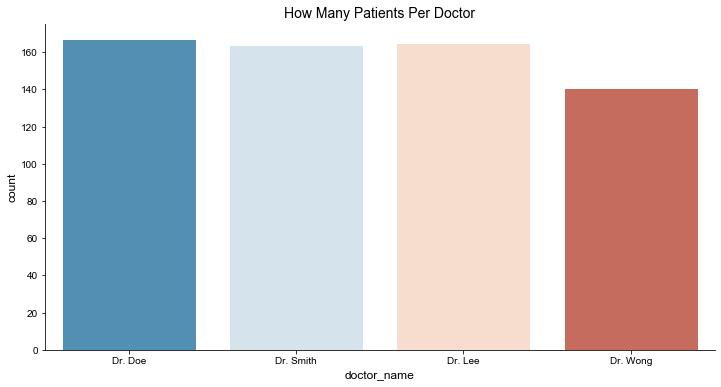

In [26]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize = fig_dims)

ax.axes.set_title("How Many Patients Per Doctor", fontsize=14)
ax.set_xlabel('doctor_name',fontsize = 12)
ax.set_ylabel('Patients',fontsize = 12)

sns.set_style('whitegrid')
sns.countplot(x = 'doctor_name', palette = 'RdBu_r', data=df)
sns.despine()

- `Dr. Doe`  :167
- `Dr. Lee`  :165
- `Dr. Smith`:164
- `Dr. Wong` :141

## Class Cases For Each Doctor?

As mentioned on the earlier sections, we have a column name `class`, which basically contains the value of either `benign` and `malignant`. We wish to understand further whether a person's tumor is `malignant` (cancerous) or `benign` (not cancerous). With that being said, let's get down to business and try to visualize them further down below.

In [27]:
class_by_doctor = df[("class")].value_counts()
class_by_doctor

benign       407
malignant    230
Name: class, dtype: int64

<IPython.core.display.Javascript object>

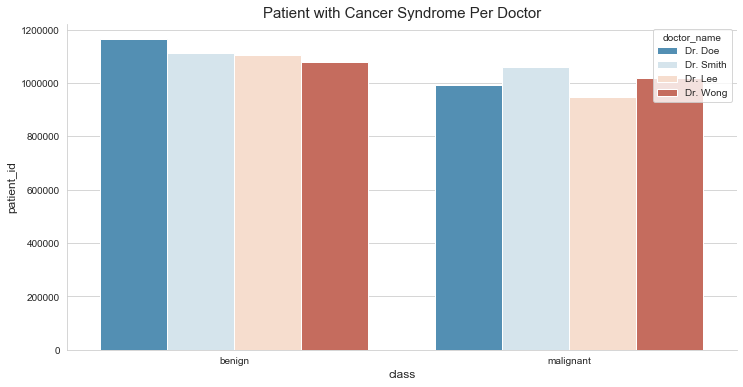

In [28]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)

ax.axes.set_title("Patient with Cancer Syndrome Per Doctor",fontsize=15)
ax.set_xlabel('X_axis',fontsize = 12)
ax.set_ylabel('Y_axis',fontsize = 12)

sns.despine()
sns.set_style('whitegrid')
sns.barplot(x="class", y="patient_id", hue="doctor_name", ci=None, palette='RdBu_r', data=df)

<IPython.core.display.Javascript object>

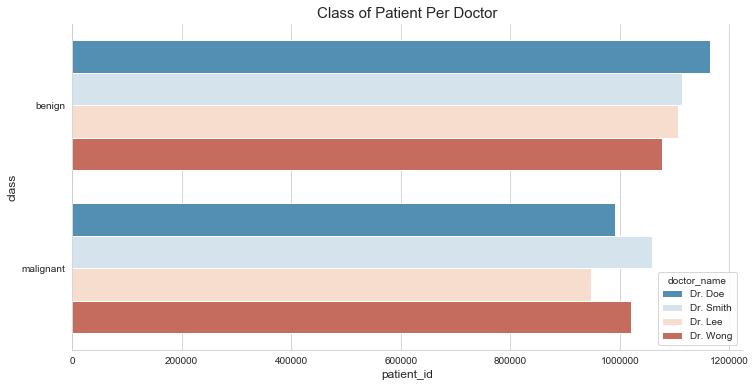

In [29]:
# This time, let's do them horizontally

fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)

ax.axes.set_title("Class of Patient Per Doctor",fontsize=15)
ax.set_xlabel('Doctor Name',fontsize = 12)
ax.set_ylabel('Patients',fontsize = 12)

sns.despine()
sns.set_style('whitegrid')
sns.barplot(x = "patient_id", y='class', hue="doctor_name", ci=None, palette='RdBu_r', data=df)

## Class Case Per Doctor?

As mentioned on the earlier sections, we have a column name `class`, which basically contains the value of `benign` and `malignant`. We wish to understand further whether a person's tumor is `malignant` (cancerous) or `benign` (not cancerous). With that being said, let's get down to business and try to visualize them further down below.

<IPython.core.display.Javascript object>

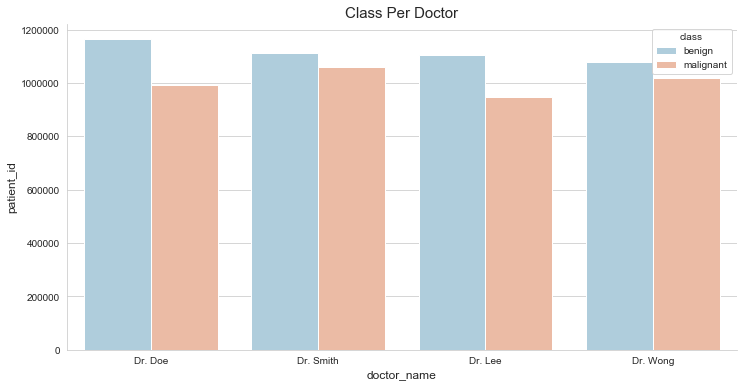

In [30]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)

ax.axes.set_title("Class Per Doctor",fontsize=15)
ax.set_xlabel('Doctor Name',fontsize = 12)
ax.set_ylabel('Patients',fontsize = 12)

sns.despine()
sns.set_style('whitegrid')
sns.barplot(x='doctor_name', y='patient_id', hue="class", ci=None, palette='RdBu_r', data=df)

<IPython.core.display.Javascript object>

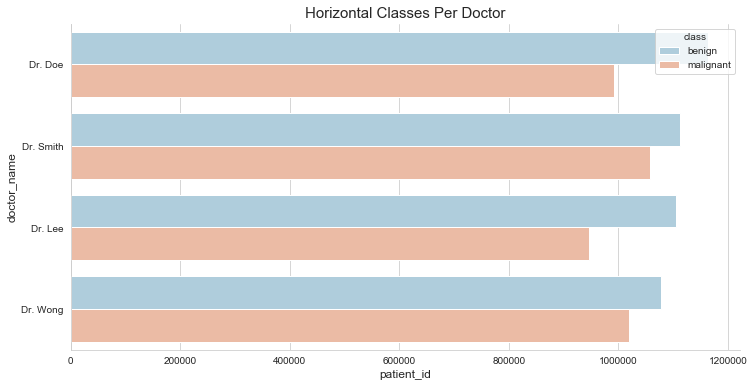

In [31]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)

ax.axes.set_title("Horizontal Classes Per Doctor",fontsize=15)
ax.set_xlabel('Doctor Name',fontsize = 12)
ax.set_ylabel('Patients',fontsize = 12)

sns.despine()
sns.set_style('whitegrid')
sns.barplot(y='doctor_name', x='patient_id', hue="class", ci=None, palette='RdBu_r', data=df)

In [32]:
df.isnull().values.any()
df.isnull().sum().sum()

0

# One Hot Encoding.

Now that we've gone through the previous topic of visualizing our dataset, let's continue to the next section of preparing them in a way that our machine learning algorithms, by which will be using them near the end of this article, would be able to pick them up and run them through our `predictive model` easily. You may ask, "Of all the previous process, they're not enough?". Well apparently, it's not sufficient enough to meet the standards. 

As among one of the challenges that we're facing is still within the dataset itself. We'll be better off by modifying them to meet the requirements. Our dataset still consist some categorical values in them, the `doctors_name` and `class` columns are two of good examples. And Machine Learning algorithm don't normally like them. We need to modify these two columns, so that it would make it easier and less confusing for the machine learning model to process through. I came across this [great example](https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621) on how to deal with the similar situation.

## `doctor_name` column.

Let's first try to deal with the `doctor_name` column. This particular consist of 4 distinct values in them and how Pandas would handle them would probably as an object rather than an integer. Let's have our work around for this particular area. Will create another variable and call it `doctors_hotEncoded` and use the `get_dummies` method to transform them to an encoded one. 

In [33]:
doctors_hotEncoded = pd.get_dummies(df['doctor_name'])

In [34]:
doctors_hotEncoded

,Dr. Doe,Dr. Lee,Dr. Smith,Dr. Wong
0,1,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
693,0,1,0,0
694,0,1,0,0
695,0,0,1,0
696,0,1,0,0


In [35]:
combined_doctors_hotEncoded_df = pd.concat([df, doctors_hotEncoded], axis=1)

In [36]:
combined_doctors_hotEncoded_df

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name,Dr. Doe,Dr. Lee,Dr. Smith,Dr. Wong
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Doe,1,0,0,0
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,benign,Dr. Smith,0,0,1,0
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,benign,Dr. Lee,0,1,0,0
3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,benign,Dr. Smith,0,0,1,0
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,benign,Dr. Wong,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,763235,3.0,1.0,1,1,2,1,2.0,1.0,2,benign,Dr. Lee,0,1,0,0
694,776715,3.0,1.0,1,1,3,2,1.0,1.0,1,benign,Dr. Lee,0,1,0,0
695,841769,2.0,1.0,1,1,2,1,1.0,1.0,1,benign,Dr. Smith,0,0,1,0
696,888820,5.0,10.0,10,3,7,3,8.0,10.0,2,malignant,Dr. Lee,0,1,0,0


In [37]:
# Now let's drop the 'doctor_name' varibale
combined_doctors_hotEncoded_df = combined_doctors_hotEncoded_df.drop(columns=['doctor_name'])

In [38]:
# This is how it would look like.
combined_doctors_hotEncoded_df

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,Dr. Doe,Dr. Lee,Dr. Smith,Dr. Wong
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,benign,1,0,0,0
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,benign,0,0,1,0
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,benign,0,1,0,0
3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,benign,0,0,1,0
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,benign,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,763235,3.0,1.0,1,1,2,1,2.0,1.0,2,benign,0,1,0,0
694,776715,3.0,1.0,1,1,3,2,1.0,1.0,1,benign,0,1,0,0
695,841769,2.0,1.0,1,1,2,1,1.0,1.0,1,benign,0,0,1,0
696,888820,5.0,10.0,10,3,7,3,8.0,10.0,2,malignant,0,1,0,0


In [39]:
combined_doctors_hotEncoded_df.isnull().values.any()
combined_doctors_hotEncoded_df.isnull().sum().sum()

0

## `class` column.

In [40]:
# How to convert benign & malingant to 0 and 1
change_class_numeric = {'benign':0, 'malignant':1}
combined_doctors_hotEncoded_df['class'] = combined_doctors_hotEncoded_df['class'].map(change_class_numeric)

In [41]:
combined_doctors_hotEncoded_df

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,Dr. Doe,Dr. Lee,Dr. Smith,Dr. Wong
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,0,1,0,0,0
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,0,0,0,1,0
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,0,0,1,0,0
3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,0,0,0,1,0
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,763235,3.0,1.0,1,1,2,1,2.0,1.0,2,0,0,1,0,0
694,776715,3.0,1.0,1,1,3,2,1.0,1.0,1,0,0,1,0,0
695,841769,2.0,1.0,1,1,2,1,1.0,1.0,1,0,0,0,1,0
696,888820,5.0,10.0,10,3,7,3,8.0,10.0,2,1,0,1,0,0


In [42]:
#Making a new column based on a nuemrical calcualtion of other columns in the df
combined_doctors_hotEncoded_df['new_column'] = df.normal_nucleoli * df.mitoses

In [43]:
combined_doctors_hotEncoded_df.head()

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,Dr. Doe,Dr. Lee,Dr. Smith,Dr. Wong,new_column
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,0,1,0,0,0,1.0
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,0,0,0,1,0,2.0
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,0,0,1,0,0,1.0
3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,0,0,0,1,0,7.0
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,0,0,0,0,1,1.0


In [44]:
combined_doctors_hotEncoded_df.isnull().values.any()
combined_doctors_hotEncoded_df.isnull().sum().sum()

0

# Feature Generation

This is among the crucial aspect area of `Machine Learning` model in the article, as this article [point out](https://towardsdatascience.com/data-wrangling-with-pandas-5b0be151df4e) an individual might be classified as having a cancer if meet the following condtion:

- Their `cell_size_uniformity` is greater than 5, and
- Their `cell_shape_uniformity` is greater than 5.

Based on this information, we could create another Feature from them.

In [45]:
# Feature building: 
def celltypelabel(x):
    if ((x['cell_size_uniformity'] > 5) & (x['cell_shape_uniformity'] > 5)):
        return('1')
    else:
        return('0')

Then we use the pandas apply function to run the `celltypelabel(x)` function on the dataframe.

In [46]:
combined_doctors_hotEncoded_df['cell_type_label'] = combined_doctors_hotEncoded_df.apply(lambda x: celltypelabel(x), axis=1)

In [47]:
combined_doctors_hotEncoded_df[['patient_id', 'cell_type_label']]

,patient_id,cell_type_label
0,1000025,0
1,1002945,0
2,1015425,0
3,1016277,1
4,1017023,0
...,...,...
693,763235,0
694,776715,0
695,841769,0
696,888820,1


In [48]:
combined_doctors_hotEncoded_df

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,Dr. Doe,Dr. Lee,Dr. Smith,Dr. Wong,new_column,cell_type_label
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,0,1,0,0,0,1.0,0
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,0,0,0,1,0,2.0,0
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,0,0,1,0,0,1.0,0
3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,0,0,0,1,0,7.0,1
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,0,0,0,0,1,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,763235,3.0,1.0,1,1,2,1,2.0,1.0,2,0,0,1,0,0,2.0,0
694,776715,3.0,1.0,1,1,3,2,1.0,1.0,1,0,0,1,0,0,1.0,0
695,841769,2.0,1.0,1,1,2,1,1.0,1.0,1,0,0,0,1,0,1.0,0
696,888820,5.0,10.0,10,3,7,3,8.0,10.0,2,1,0,1,0,0,20.0,1


In [49]:
combined_doctors_hotEncoded_df.isnull().values.any()
combined_doctors_hotEncoded_df.isnull().sum().sum()

0

In [50]:
combined_doctors_hotEncoded_df.describe()

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bland_chromatin,normal_nucleoli,mitoses,class,Dr. Doe,Dr. Lee,Dr. Smith,Dr. Wong,new_column
count,6.370000e+02,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000
mean,1.076689e+06,4.488226,3.210361,3.298273,2.897959,3.284144,3.516484,2.971743,1.629513,0.361068,0.262166,0.259027,0.257457,0.221350,7.197802
std,6.408652e+05,2.855856,3.080628,3.007153,2.924191,2.243639,2.470924,3.146200,1.783293,0.480688,0.440158,0.438445,0.437577,0.415482,16.037352
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,8.779430e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.173235e+06,4.000000,1.000000,2.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.238464e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,6.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


In [51]:
combined_doctors_hotEncoded_df.isnull().values.any()
combined_doctors_hotEncoded_df.isnull().sum().sum()

0

In [52]:
pd.crosstab(combined_doctors_hotEncoded_df['class'], combined_doctors_hotEncoded_df['cell_type_label'])

cell_type_label,0,1
class,,
0,404,3
1,118,112


## Correlating Features

Heatmap of Correlation between different features:

> `Positive` = Positive correlation, i.e. increase in one feature will increase the other feature & vice-versa.<br >
> `Negative` = Negative correlation, i.e. increase in one feature will decrease the other feature & vice-versa.

In our case, we focus on which features have strong positive or negative correlation with the *Survived* feature.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

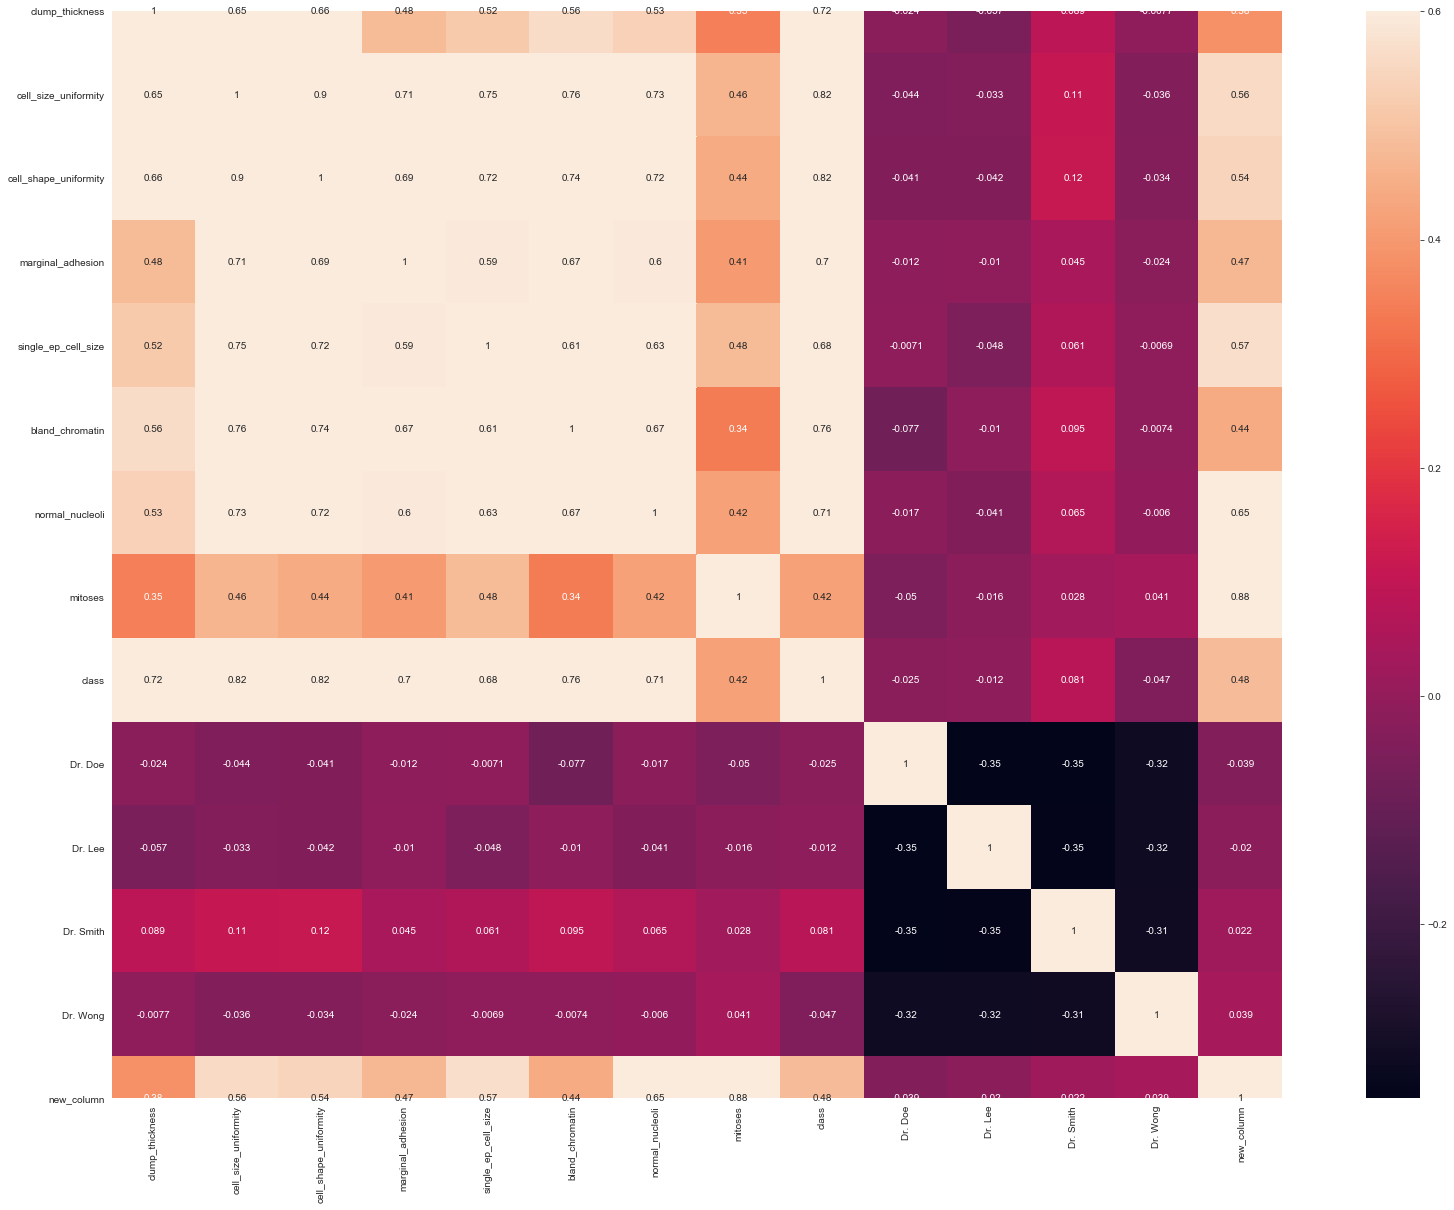

In [53]:
plt.figure(figsize=(30,20))
plt.xlabel("Values on X axis")
plt.ylabel('Values on Y axis')
sns.heatmap(combined_doctors_hotEncoded_df.drop('patient_id',axis=1).corr(), 
            xticklabels=True,
            vmax=0.6, 
            square=True, 
            annot=True)

# Splitting Dataset for Testing

In [54]:
combined_doctors_hotEncoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637 entries, 0 to 697
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             637 non-null    int64  
 1   clump_thickness        637 non-null    float64
 2   cell_size_uniformity   637 non-null    float64
 3   cell_shape_uniformity  637 non-null    int64  
 4   marginal_adhesion      637 non-null    int64  
 5   single_ep_cell_size    637 non-null    int64  
 6   bare_nuclei            637 non-null    object 
 7   bland_chromatin        637 non-null    float64
 8   normal_nucleoli        637 non-null    float64
 9   mitoses                637 non-null    int64  
 10  class                  637 non-null    int64  
 11  Dr. Doe                637 non-null    uint8  
 12  Dr. Lee                637 non-null    uint8  
 13  Dr. Smith              637 non-null    uint8  
 14  Dr. Wong               637 non-null    uint8  
 15  new_co

In [55]:
# Let's try to change the datatypes of the following column in the dataset.
# combined_doctors_hotEncoded_df['bare_nuclei'] = combined_doctors_hotEncoded_df['bare_nuclei'].astype('int64')
combined_doctors_hotEncoded_df['cell_type_label'] = combined_doctors_hotEncoded_df['cell_type_label'].astype('float64')

In [56]:
combined_doctors_hotEncoded_df.isnull().values.any()

False

In [57]:
combined_doctors_hotEncoded_df.isnull().sum().sum()

0

In [58]:
combined_doctors_hotEncoded_df['bare_nuclei'].describe()

count     637
unique     11
top         1
freq      357
Name: bare_nuclei, dtype: object

In [59]:
combined_doctors_hotEncoded_df['bare_nuclei'] = pd.to_numeric(combined_doctors_hotEncoded_df.bare_nuclei, errors='coerce')

In [60]:
combined_doctors_hotEncoded_df.dropna(axis=0, how='any', inplace=True)

In [61]:
np.any(np.isnan(combined_doctors_hotEncoded_df))

False

In [62]:
np.all(np.isfinite(combined_doctors_hotEncoded_df))

True

In [63]:
combined_doctors_hotEncoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621 entries, 0 to 697
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             621 non-null    int64  
 1   clump_thickness        621 non-null    float64
 2   cell_size_uniformity   621 non-null    float64
 3   cell_shape_uniformity  621 non-null    int64  
 4   marginal_adhesion      621 non-null    int64  
 5   single_ep_cell_size    621 non-null    int64  
 6   bare_nuclei            621 non-null    float64
 7   bland_chromatin        621 non-null    float64
 8   normal_nucleoli        621 non-null    float64
 9   mitoses                621 non-null    int64  
 10  class                  621 non-null    int64  
 11  Dr. Doe                621 non-null    uint8  
 12  Dr. Lee                621 non-null    uint8  
 13  Dr. Smith              621 non-null    uint8  
 14  Dr. Wong               621 non-null    uint8  
 15  new_co

In [64]:
combined_doctors_hotEncoded_df.isnull().sum().sum()

0

# Machine Learning

In [65]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(combined_doctors_hotEncoded_df, test_size=0.2)

In [66]:
train, test = train_test_split(combined_doctors_hotEncoded_df, test_size=0.2)
train = pd.DataFrame(train)
test = pd.DataFrame(test)

# train.to_csv('train.csv', encoding='utf-8', index = False)
# test.to_csv('test.csv', encoding='utf-8', index = False)

In [67]:
X_train = train.drop('cell_type_label', axis=1)
y_train = train['cell_type_label']
X_test = test.drop("patient_id", axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

# X_test.to_csv('submission2.csv', index=False)
# y_train.to_csv('submission3.csv', index=False)
# X_test.to_csv('submission4.csv', index=False)

# X_train = train.drop('Survived', axis=1)
# y_train = train['Survived']
# X_test = test.drop("PassengerId", axis=1).copy()

# X_train.shape, y_train.shape, X_test.shape

((496, 16), (496,), (125, 16))

In [68]:
X_train

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,Dr. Doe,Dr. Lee,Dr. Smith,Dr. Wong,new_column
629,1218982,4.0,1.0,1,1,2,1.0,1.0,1.0,1,0,0,0,0,1,1.0
246,144888,8.0,10.0,10,8,5,10.0,7.0,8.0,1,1,0,0,1,0,8.0
56,1112209,8.0,10.0,10,1,3,6.0,3.0,9.0,1,1,0,0,1,0,9.0
425,1258549,9.0,10.0,10,10,10,10.0,10.0,10.0,1,1,0,0,0,1,10.0
46,1105257,3.0,7.0,7,4,4,9.0,4.0,8.0,1,1,0,0,0,1,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,1186936,2.0,1.0,3,2,2,1.0,2.0,1.0,1,0,0,1,0,0,1.0
472,1257608,6.0,1.0,1,1,1,1.0,1.0,1.0,1,0,0,0,0,1,1.0
268,324427,10.0,8.0,8,2,3,4.0,8.0,7.0,8,1,1,0,0,0,56.0
279,476903,10.0,5.0,7,3,3,7.0,3.0,3.0,8,1,0,0,0,1,24.0


In [69]:
y_train

629    0.0
246    1.0
56     1.0
425    1.0
46     1.0
      ... 
544    0.0
472    0.0
268    1.0
279    0.0
296    0.0
Name: cell_type_label, Length: 496, dtype: float64

In [70]:
X_test

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,Dr. Doe,Dr. Lee,Dr. Smith,Dr. Wong,new_column,cell_type_label
362,3.0,2.0,2,1,4,3.0,2.0,1.0,1,0,0,1,0,0,1.0,0.0
151,7.0,2.0,4,1,6,10.0,5.0,4.0,3,1,0,0,1,0,12.0,0.0
280,3.0,1.0,1,1,2,1.0,3.0,1.0,1,0,0,0,0,1,1.0,0.0
211,8.0,10.0,8,8,4,8.0,7.0,7.0,1,1,0,0,1,0,7.0,1.0
131,2.0,1.0,1,1,2,1.0,3.0,1.0,1,0,0,0,0,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,3.0,3.0,5,2,3,10.0,7.0,1.0,1,1,0,0,0,1,1.0,0.0
418,5.0,2.0,2,2,2,2.0,3.0,2.0,2,0,0,0,1,0,4.0,0.0
643,1.0,1.0,1,1,2,1.0,1.0,1.0,1,0,0,0,0,1,1.0,0.0
203,5.0,1.0,1,1,2,1.0,3.0,1.0,1,0,1,0,0,0,1.0,0.0


In [71]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [72]:
train.head()

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,Dr. Doe,Dr. Lee,Dr. Smith,Dr. Wong,new_column,cell_type_label
629,1218982,4.0,1.0,1,1,2,1.0,1.0,1.0,1,0,0,0,0,1,1.0,0.0
246,144888,8.0,10.0,10,8,5,10.0,7.0,8.0,1,1,0,0,1,0,8.0,1.0
56,1112209,8.0,10.0,10,1,3,6.0,3.0,9.0,1,1,0,0,1,0,9.0,1.0
425,1258549,9.0,10.0,10,10,10,10.0,10.0,10.0,1,1,0,0,0,1,10.0,1.0
46,1105257,3.0,7.0,7,4,4,9.0,4.0,8.0,1,1,0,0,0,1,8.0,1.0


In [73]:
test.head()

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,Dr. Doe,Dr. Lee,Dr. Smith,Dr. Wong,new_column,cell_type_label
362,888169,3.0,2.0,2,1,4,3.0,2.0,1.0,1,0,0,1,0,0,1.0,0.0
151,1189266,7.0,2.0,4,1,6,10.0,5.0,4.0,3,1,0,0,1,0,12.0,0.0
280,486283,3.0,1.0,1,1,2,1.0,3.0,1.0,1,0,0,0,0,1,1.0,0.0
211,1219859,8.0,10.0,8,8,4,8.0,7.0,7.0,1,1,0,0,1,0,7.0,1.0
131,1179818,2.0,1.0,1,1,2,1.0,3.0,1.0,1,0,0,0,0,1,1.0,0.0


## Logistic Regression

[Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression), or logit regression, or logit model is a regression model where the dependent variable (DV) is categorical. This article covers the case of a binary dependent variable—that is, where it can take only two values, "0" and "1", which represent outcomes such as pass/fail, win/lose, alive/dead or healthy/sick. Cases where the dependent variable has more than two outcome categories may be analysed in multinomial logistic regression, or, if the multiple categories are ordered, in ordinal logistic regression.

In [74]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' percent')

83.27 percent


## Support Vector Machine (SVM)

[Support Vector Machine (SVM)](https://en.wikipedia.org/wiki/Support_vector_machine) model is a Supervised Learning model used for classification and regression analysis. It is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces. Suppose some given data points each belong to one of two classes, and the goal is to decide which class a new data point will be in. In the case of support vector machines, a data point is viewed as a $p$-dimensional vector (a list of $p$ numbers), and we want to know whether we can separate such points with a $(p-1)$-dimensional hyperplane.

When data are not labeled, supervised learning is not possible, and an unsupervised learning approach is required, which attempts to find natural clustering of the data to groups, and then map new data to these formed groups. The clustering algorithm which provides an improvement to the support vector machines is called **support vector clustering** and is often used in industrial applications either when data are not labeled or when only some data are labeled as a preprocessing for a classification pass.

In the below code, [SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) stands for Support Vector Classification.

In [75]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print (acc_svc)

83.27


## Linear SVM

Linear SVM is a SVM model with linear kernel.

In the below code, [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) stands for Linear Support Vector Classification.

In [76]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)
print (acc_linear_svc)

83.27


/Volumes/DATA/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## $k$-Nearest Neighbors

[$k$-nearest neighbors algorithm (k-NN)](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) is one of the simplest machine learning algorithms and is used for classification and regression. In both cases, the input consists of the $k$ closest training examples in the feature space. The output depends on whether $k$-NN is used for classification or regression:

- In *$k$-NN classification*, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its $k$ nearest neighbors ($k$ is a positive integer, typically small). If $k = 1$, then the object is simply assigned to the class of that single nearest neighbor.


- In *$k$-NN regression*, the output is the property value for the object. This value is the average of the values of its $k$ nearest neighbors.

In [77]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print (acc_knn)

85.69


## Decision Tree

A [decision tree](https://en.wikipedia.org/wiki/Decision_tree) is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

In [78]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)
print (acc_decision_tree)

100.0


### Random Forest

[Random forests](https://en.wikipedia.org/wiki/Random_forest) or **random decision forests** are an **ensemble learning method** for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for *decision trees' habit of overfitting to their training set*.

[Ensemble methods](https://en.wikipedia.org/wiki/Ensemble_learning) use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.

In [79]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print (acc_random_forest)

100.0


## Gaussian Naive Bayes

[Naive Bayes classifiers](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

[Bayes' theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem) (alternatively **Bayes' law** or **Bayes' rule**) describes the probability of an event, based on prior knowledge of conditions that might be related to the event. For example, if cancer is related to age, then, using Bayes' theorem, a person's age can be used to more accurately assess the probability that they have cancer, compared to the assessment of the probability of cancer made without knowledge of the person's age.

Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. It is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. For example, a fruit may be considered to be an apple if it is red, round, and about 10 cm in diameter. A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.

In [80]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_train, y_train) * 100, 2)
print (acc_gnb)

85.48


## Perceptron

[Perceptron](https://en.wikipedia.org/wiki/Perceptron) is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.

In [81]:
clf = Perceptron(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_perceptron = clf.predict(X_test)
acc_perceptron = round(clf.score(X_train, y_train) * 100, 2)
print (acc_perceptron)

16.73


## Stochastic Gradient Descent (SGD)

[Stochastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) (often shortened in **SGD**), also known as incremental gradient descent, is a stochastic approximation of the gradient descent optimization method for minimizing an objective function that is written as a sum of differentiable functions. In other words, SGD tries to find minima or maxima by iteration.

In [82]:
clf = SGDClassifier(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_sgd = clf.predict(X_test)
acc_sgd = round(clf.score(X_train, y_train) * 100, 2)
print (acc_sgd)

83.27


## Confusion Matrix

A [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix), also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm. Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa). The name stems from the fact that it makes it easy to see if the system is confusing two classes (i.e. commonly mislabelling one as another).

In predictive analytics, a table of confusion (sometimes also called a confusion matrix), is a table with two rows and two columns that reports the number of false positives, false negatives, true positives, and true negatives. This allows more detailed analysis than mere proportion of correct classifications (accuracy). Accuracy is not a reliable metric for the real performance of a classifier, because it will yield misleading results if the data set is unbalanced (that is, when the numbers of observations in different classes vary greatly). For example, if there were 95 cats and only 5 dogs in the data set, a particular classifier might classify all the observations as cats. The overall accuracy would be 95%, but in more detail the classifier would have a 100% recognition rate for the cat class but a 0% recognition rate for the dog class.

Here's another guide explaining [Confusion Matrix with example](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/).

$\begin{matrix} & Predicted Positive & Predicted Negative \\ Actual Positive & TP & FN \\ Actual Negative & FP & TN \end{matrix}$

In our (Titanic problem) case: 

>**True Positive:** The classifier predicted *Survived* **and** the passenger actually *Survived*.<br />
>**True Negative:** The classifier predicted *Not Survived* **and** the passenger actually *Not Survived*.<br />
>**False Postiive:** The classifier predicted *Survived* **but** the passenger actually *Not Survived*.<br />
>**False Negative:** The classifier predicted *Not Survived* **but** the passenger actually *Survived*.

In the example code below, we plot a confusion matrix for the prediction of ***Random Forest Classifier*** on our training dataset. This shows how many entries are correctly and incorrectly predicted by our classifer.

Accuracy: 100 % 

Confusion Matrix in Numbers
[[413   0]
 [  0  83]]

Confusion Matrix in Percentage
[[1. 0.]
 [0. 1.]]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

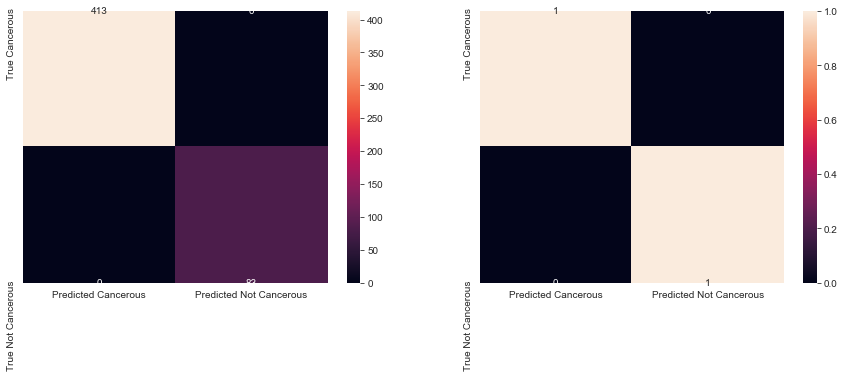

In [83]:
from sklearn.metrics import confusion_matrix
import itertools

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest_training_set = clf.predict(X_train)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_random_forest)

class_names = ['Cancerous', 'Not Cancerous']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_random_forest_training_set)
np.set_printoptions(precision=2)

print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['True Cancerous', 'True Not Cancerous']
predicted_class_names = ['Predicted Cancerous', 'Predicted Not Cancerous']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)

## Comparing Models

Let's compare the accuracy score of all the classifier models used above.

In [84]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent'],
    
    'Score': [acc_log_reg, acc_svc, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
              acc_perceptron, acc_sgd]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,100.00
5,Random Forest,100.00
3,KNN,85.69
6,Naive Bayes,85.48
0,Logistic Regression,83.27
1,Support Vector Machines,83.27
2,Linear SVC,83.27
8,Stochastic Gradient Decent,83.27
7,Perceptron,16.73


From the above table, we can see that *Decision Tree* and *Random Forest* classfiers have the highest accuracy score. Among these two, we choose *Random Forest* classifier as it has the ability to limit overfitting as compared to *Decision Tree* classifier.

# Create Submission File to Kaggle

In [85]:
submission = pd.DataFrame({
        "patient_id": test["patient_id"],
        "cell_type_label": y_pred_random_forest
    })

submission.to_csv('submission.csv', index=False)